In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data collection

In [ ]:
df = pd.read_csv("/content/cars_ds_final.csv",index_col=0)

In [ ]:
df.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Basic information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Columns: 140 entries, Make to Electric_Range
dtypes: float64(6), object(134)
memory usage: 1.4+ MB


In [ ]:
df.shape

(1276, 140)

Missing values

In [ ]:
df.isna().sum()

Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
Displacement           12
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 140, dtype: int64

Column adjustment

In [ ]:
df.columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=140)

In [ ]:
df.rename(columns = str.lower,inplace=True)

In [ ]:
df.columns

Index(['make', 'model', 'variant', 'ex-showroom_price', 'displacement',
       'cylinders', 'valves_per_cylinder', 'drivetrain',
       'cylinder_configuration', 'emission_norm',
       ...
       'leather_wrapped_steering', 'automatic_headlamps', 'engine_type',
       'asr_/_traction_control', 'cruise_control', 'usb_ports',
       'heads-up_display', 'welcome_lights', 'battery', 'electric_range'],
      dtype='object', length=140)

data types

In [ ]:
df.dtypes

make                  object
model                 object
variant               object
ex-showroom_price     object
displacement          object
                      ...   
usb_ports            float64
heads-up_display      object
welcome_lights        object
battery               object
electric_range        object
Length: 140, dtype: object

Descriptive Statistics

In [ ]:
df.describe()

,cylinders,valves_per_cylinder,doors,seating_capacity,number_of_airbags,usb_ports
count,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


## Data Cleaning

In [ ]:
df.isna().sum()

make                   75
model                   0
variant                 0
ex-showroom_price       0
displacement           12
                     ... 
usb_ports            1247
heads-up_display     1225
welcome_lights       1207
battery              1263
electric_range       1259
Length: 140, dtype: int64

In [ ]:
df['make'].value_counts()

Maruti Suzuki    163
Hyundai          130
Mahindra         119
Tata             100
Toyota            82
Honda             64
Skoda             43
Ford              43
Land Rover        37
Bmw               37
Renault           36
Volkswagen        34
Audi              31
Nissan            29
Jeep              28
Fiat              23
Jaguar            22
Kia               21
Volvo             18
Datsun            15
Porsche           14
Mg                13
Lamborghini       13
Icml              11
Mini              10
Lexus             10
Maserati           9
Ferrari            8
Mitsubishi         7
Bentley            6
Force              6
Premier            6
Isuzu              5
Aston Martin       3
Bugatti            2
Bajaj              2
Dc                 1
Name: make, dtype: int64

In [ ]:
df[df['make'].isna()]

,make,model,variant,ex-showroom_price,displacement,cylinders,valves_per_cylinder,drivetrain,cylinder_configuration,emission_norm,...,leather_wrapped_steering,automatic_headlamps,engine_type,asr_/_traction_control,cruise_control,usb_ports,heads-up_display,welcome_lights,battery,electric_range
252,NaN,Mercedes-Benz B-Class,B 180 Sport,"Rs. 29,88,311",1595 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
253,NaN,Mercedes-Benz B-Class,B 200 Cdi Sport,"Rs. 30,89,851",2143 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
254,NaN,Mercedes-Benz B-Class,B 180 Night Edition,"Rs. 31,98,662",1595 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
255,NaN,Mercedes-Benz B-Class,B 200 Cdi Night Edition,"Rs. 33,03,282",2143 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
256,NaN,Mercedes-Benz Cla-Class,200 Sport,"Rs. 35,99,000",1991 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,NaN,Mercedes-Benz Gla-Class,45 Aero Edition,"Rs. 80,67,000",1991 cc,4.0,4.0,4WD,In-line,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1219,NaN,Rolls-Royce Phantom,Sedan,"Rs. 9,50,00,000",6749 cc,12.0,4.0,RWD (Rear Wheel Drive),V,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1220,NaN,Rolls-Royce Phantom,Ewb,"Rs. 7,54,00,000",6749 cc,12.0,4.0,RWD (Rear Wheel Drive),V,BS IV,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1251,NaN,Mercedes-Benz Glc,200 Progressive,"Rs. 52,75,000",1991 cc,4.0,4.0,RWD (Rear Wheel Drive),In-line,BS 6,...,Yes,Yes,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN


In [ ]:
df[df['make'] == 'Maruti Suzuki R']

,make,model,variant,ex-showroom_price,displacement,cylinders,valves_per_cylinder,drivetrain,cylinder_configuration,emission_norm,...,leather_wrapped_steering,automatic_headlamps,engine_type,asr_/_traction_control,cruise_control,usb_ports,heads-up_display,welcome_lights,battery,electric_range
1173,Maruti Suzuki R,Wagon,Vxi,"Rs. 4,79,000",998 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1174,Maruti Suzuki R,Wagon,Vxi Ags,"Rs. 5,26,000",998 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1175,Maruti Suzuki R,Wagon,1.2L Zxi,"Rs. 5,48,000",1197 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1176,Maruti Suzuki R,Wagon,Lxi,"Rs. 4,34,000",998 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1177,Maruti Suzuki R,Wagon,1.2L Vxi,"Rs. 5,13,501",1197 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1178,Maruti Suzuki R,Wagon,1.2L Vxi Ags,"Rs. 5,60,500",1197 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1179,Maruti Suzuki R,Wagon,1.2L Zxi Ags,"Rs. 5,94,800",1197 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1180,Maruti Suzuki R,Wagon,Lxi (O),"Rs. 4,41,000",998 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1181,Maruti Suzuki R,Wagon,Vxi (O),"Rs. 4,86,001",998 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1182,Maruti Suzuki R,Wagon,1.2L Vxi (O),"Rs. 5,20,500",1197 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['displacement'].value_counts()

1197 cc    108
1498 cc     87
1248 cc     62
1198 cc     58
1497 cc     56
          ... 
6750 cc      1
3198 cc      1
2400 cc      1
3900 cc      1
3200 cc      1
Name: displacement, Length: 129, dtype: int64

In [ ]:
df['model'].value_counts()

Nexon                              24
Kuv100 Nxt                         22
Compass                            21
Xuv500                             21
Amaze                              20
                                   ..
Lc 500H                             1
Lx 450D                             1
Mercedes-Benz S-Class Cabriolet     1
R8                                  1
Montero                             1
Name: model, Length: 263, dtype: int64

In [ ]:
df['usb_ports'].value_counts()

1.0    12
2.0    11
3.0     6
Name: usb_ports, dtype: int64

## EDA

In [ ]:
df.head()

,make,model,variant,ex-showroom_price,displacement,cylinders,valves_per_cylinder,drivetrain,cylinder_configuration,emission_norm,...,leather_wrapped_steering,automatic_headlamps,engine_type,asr_/_traction_control,cruise_control,usb_ports,heads-up_display,welcome_lights,battery,electric_range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['make', 'model', 'variant', 'ex-showroom_price', 'displacement',
       'cylinders', 'valves_per_cylinder', 'drivetrain',
       'cylinder_configuration', 'emission_norm',
       ...
       'leather_wrapped_steering', 'automatic_headlamps', 'engine_type',
       'asr_/_traction_control', 'cruise_control', 'usb_ports',
       'heads-up_display', 'welcome_lights', 'battery', 'electric_range'],
      dtype='object', length=140)

Histograms

In [ ]:
new_df = df[['make','model','ex-showroom_price','body_type','displacement', 'cylinders', 'fuel_system', 'fuel_tank_capacity', 'fuel_type',  'city_mileage',  'seating_capacity','basic_warranty', 'child_safety_locks', 'number_of_airbags', 'parking_assistance',  'navigation_system']]

In [ ]:
new_df.shape

(1276, 16)

In [ ]:
new_df.columns

Index(['make', 'model', 'ex-showroom_price', 'body_type', 'displacement',
       'cylinders', 'fuel_system', 'fuel_tank_capacity', 'fuel_type',
       'city_mileage', 'seating_capacity', 'basic_warranty',
       'child_safety_locks', 'number_of_airbags', 'parking_assistance',
       'navigation_system'],
      dtype='object')

In [ ]:
df['model'].nunique()

263

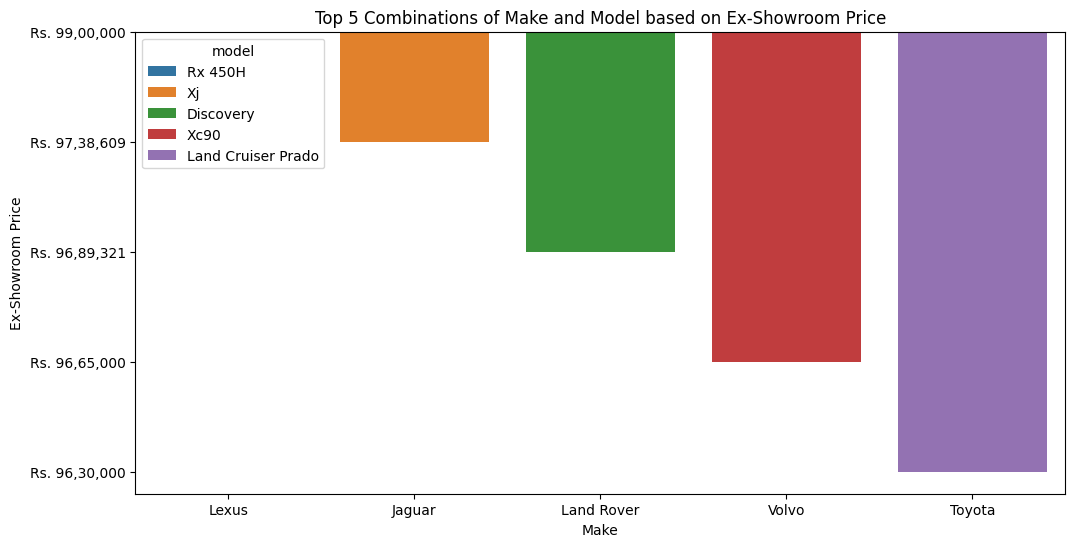

In [ ]:
import seaborn as sns
top_prices_df = df.sort_values(by='ex-showroom_price', ascending=False).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x='make', y='ex-showroom_price', hue='model', data=top_prices_df)
plt.title('Top 5 Combinations of Make and Model based on Ex-Showroom Price')
plt.xlabel('Make')
plt.ylabel('Ex-Showroom Price')
plt.show()

In [ ]:
new_df.head()

,make,model,ex-showroom_price,body_type,displacement,cylinders,fuel_system,fuel_tank_capacity,fuel_type,city_mileage,seating_capacity,basic_warranty,child_safety_locks,number_of_airbags,parking_assistance,navigation_system
0,Tata,Nano Genx,"Rs. 2,92,667",Hatchback,624 cc,2.0,Injection,24 litres,Petrol,?23.6 km/litre,4.0,2 years /75000 Kms (years/distance whichever c...,Yes,NaN,NaN,NaN
1,Tata,Nano Genx,"Rs. 2,36,447",Hatchback,624 cc,2.0,Injection,24 litres,Petrol,?23.6 km/litre,4.0,2 years /75000 Kms (years/distance whichever c...,Yes,NaN,NaN,NaN
2,Tata,Nano Genx,"Rs. 2,96,661",Hatchback,624 cc,2.0,Injection,15 litres,CNG,NaN,4.0,2 years /75000 Kms (years/distance whichever c...,Yes,NaN,NaN,NaN
3,Tata,Nano Genx,"Rs. 3,34,768",Hatchback,624 cc,2.0,Injection,24 litres,Petrol,?23.6 km/litre,4.0,2 years /75000 Kms (years/distance whichever c...,Yes,NaN,NaN,NaN
4,Tata,Nano Genx,"Rs. 2,72,223",Hatchback,624 cc,2.0,Injection,24 litres,Petrol,?23.6 km/litre,4.0,2 years /75000 Kms (years/distance whichever c...,Yes,NaN,NaN,NaN


In [ ]:
new_df.describe()

,cylinders,seating_capacity,number_of_airbags
count,1210.000000,1270.000000,1141.000000
mean,4.380992,5.270079,3.787029
std,1.660957,1.145231,2.522399
min,2.000000,2.000000,1.000000
25%,4.000000,5.000000,2.000000
50%,4.000000,5.000000,2.000000
75%,4.000000,5.000000,6.000000
max,16.000000,16.000000,14.000000


Histogram

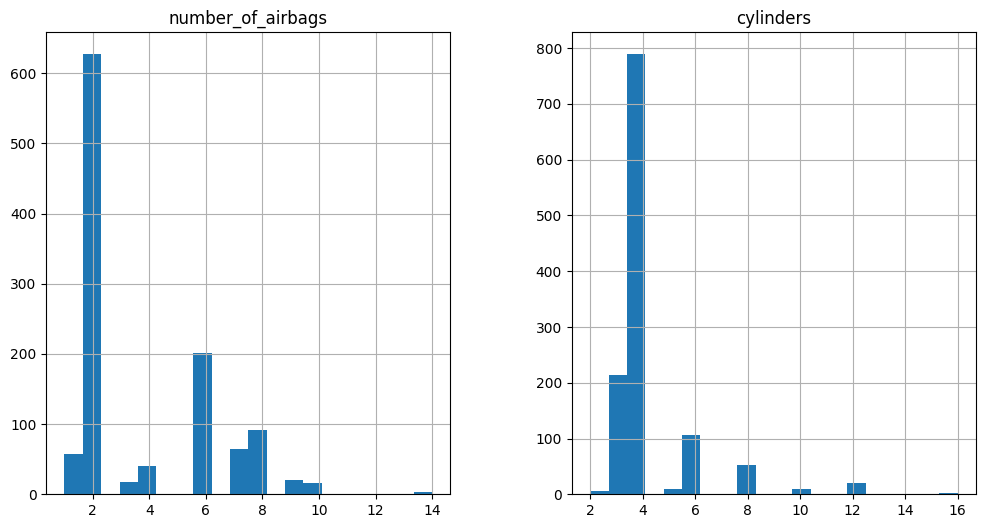

In [57]:
numeric_variables = ['number_of_airbags', 'cylinders']
new_df[numeric_variables].hist(bins=20, figsize=(12, 6))
plt.show()

Count plot / Bar chart

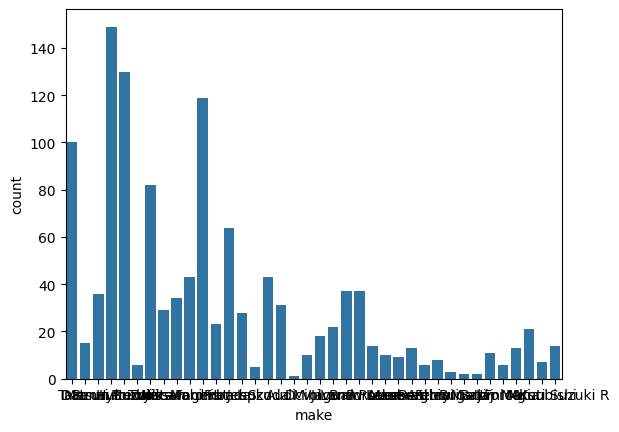

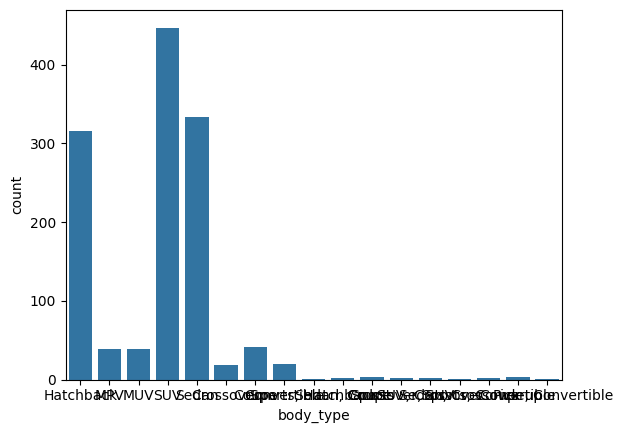

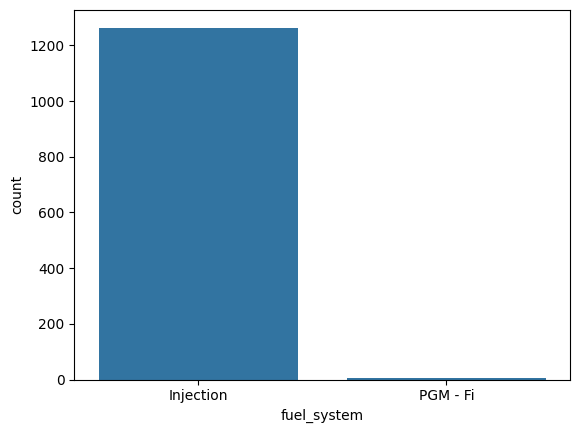

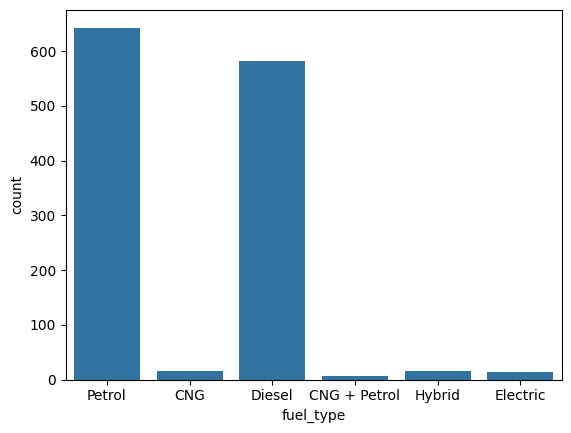

In [58]:
categorical_variables = ['make', 'body_type', 'fuel_system', 'fuel_type']
for var in categorical_variables:
    sns.countplot(x=var, data=new_df)
    plt.show()

Box plot

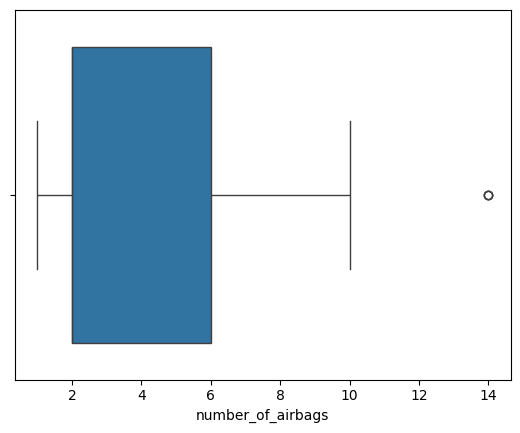

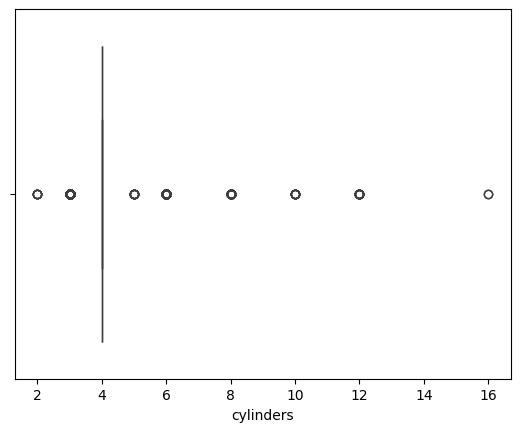

In [59]:
for var in numeric_variables:
    sns.boxplot(x=var, data=new_df)
    plt.show()

Pie Chart

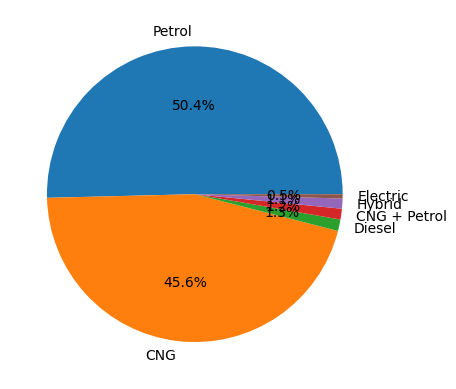

In [60]:
plt.pie(new_df['fuel_type'].value_counts(), labels=new_df['fuel_type'].unique(), autopct='%1.1f%%')
plt.show()

Bar chart / count plot

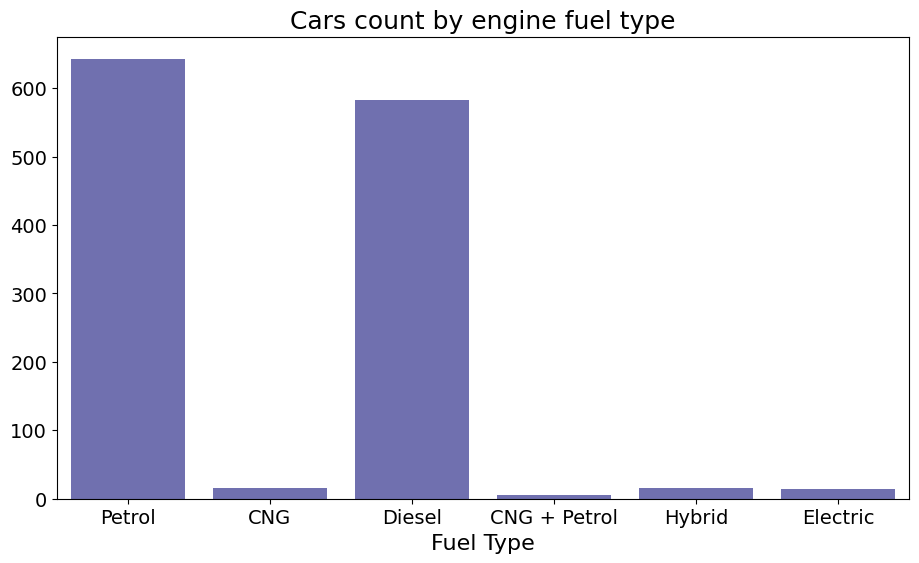

In [72]:
plt.figure(figsize=(11,6))
sns.countplot(data=df, x='fuel_type',alpha=.6, color='darkblue')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('');

Bar chart

<ipython-input-73-3cf35cc055e1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='contribution', y='model', data=top_models, palette='viridis')


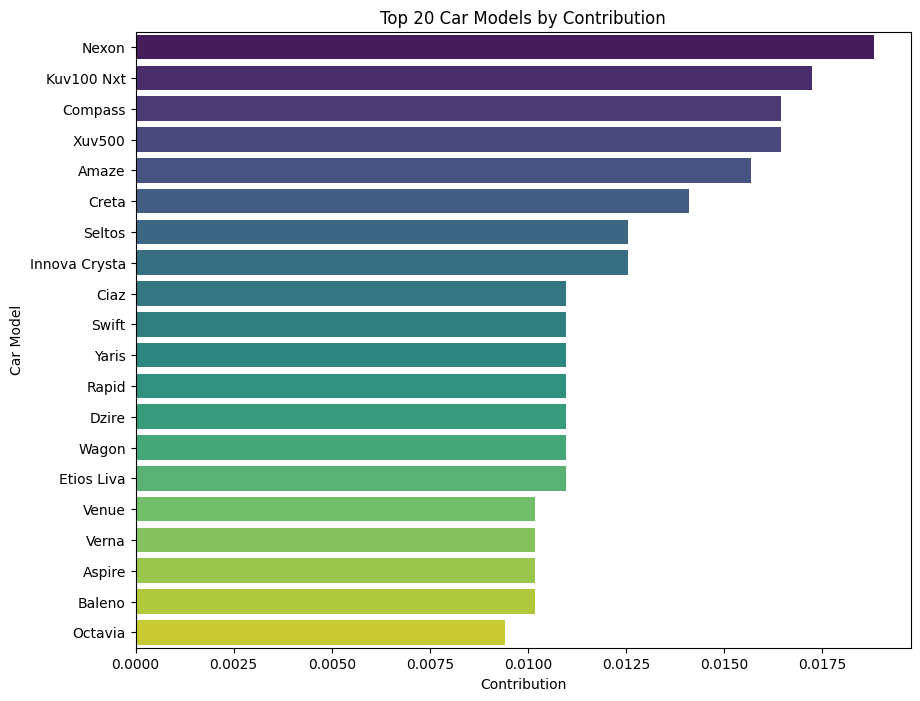

In [73]:
model_contribution = df['model'].value_counts(normalize=True).reset_index()
model_contribution.columns = ['model', 'contribution']

top_models = model_contribution.nlargest(20, 'contribution')

plt.figure(figsize=(10, 8))
sns.barplot(x='contribution', y='model', data=top_models, palette='viridis')
plt.title('Top 20 Car Models by Contribution')
plt.xlabel('Contribution')
plt.ylabel('Car Model')
plt.show()

## Bivariate Analysis

Correlation Matrix / heatmap

<ipython-input-62-c4d5e944faa7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_df.corr()


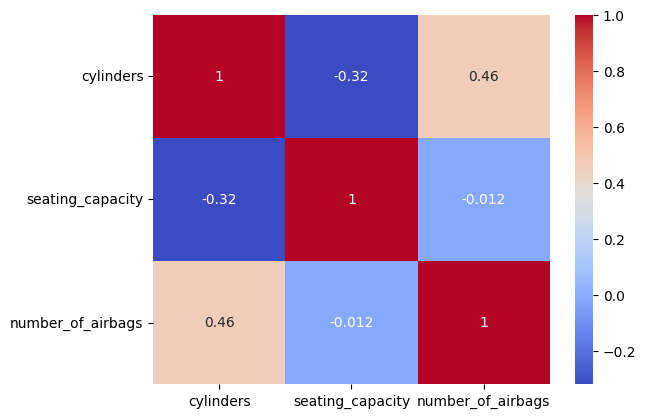

In [62]:
correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Pair Plots

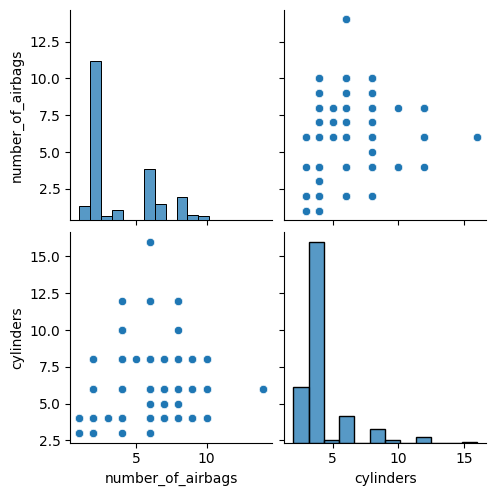

In [64]:
sns.pairplot(new_df[numeric_variables])
plt.show()

Bar Charts with Hue

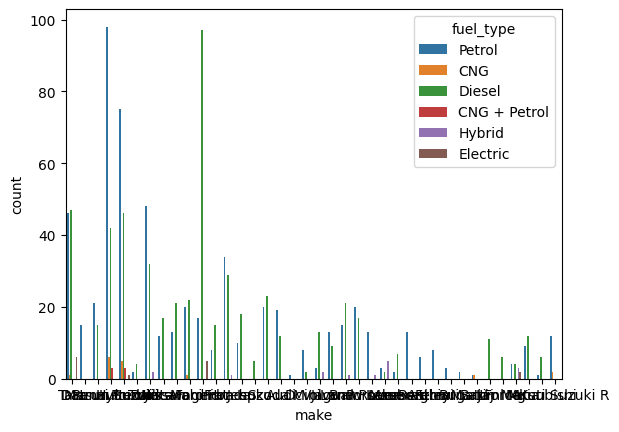

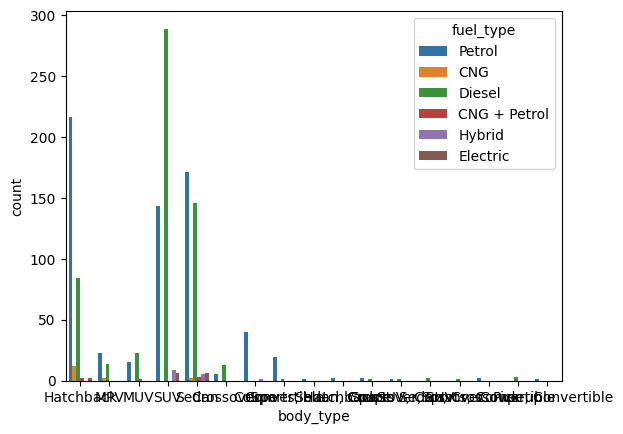

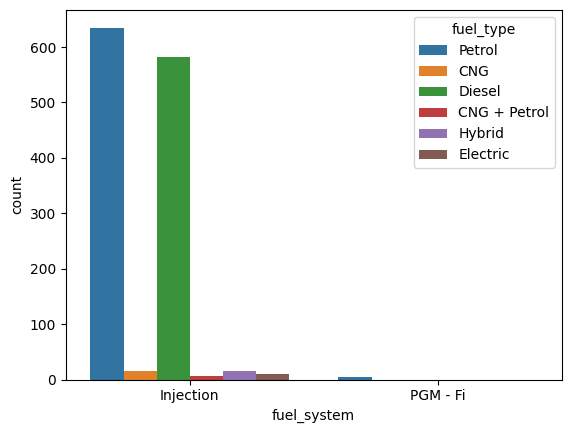

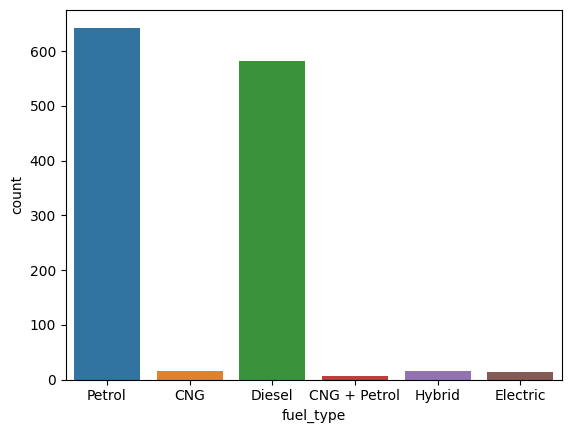

In [65]:
for var in categorical_variables:
    sns.countplot(x=var, hue='fuel_type', data=new_df)
    plt.show()

Box Plots with Hue


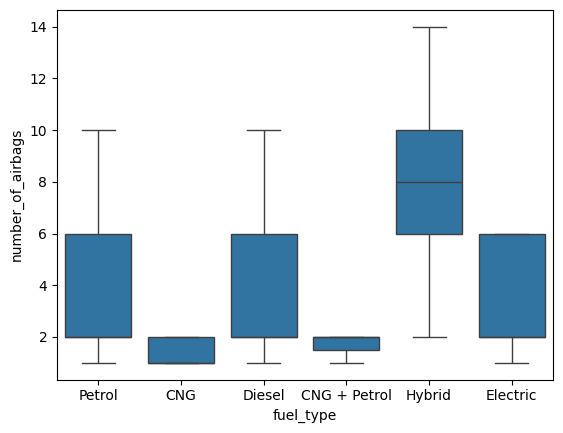

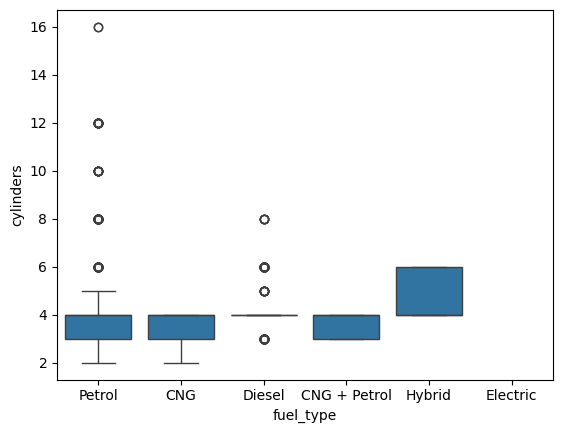

In [68]:
for var in numeric_variables:
    sns.boxplot(x='fuel_type', y=var, data=new_df)
    plt.show()

Stacked Bar Charts

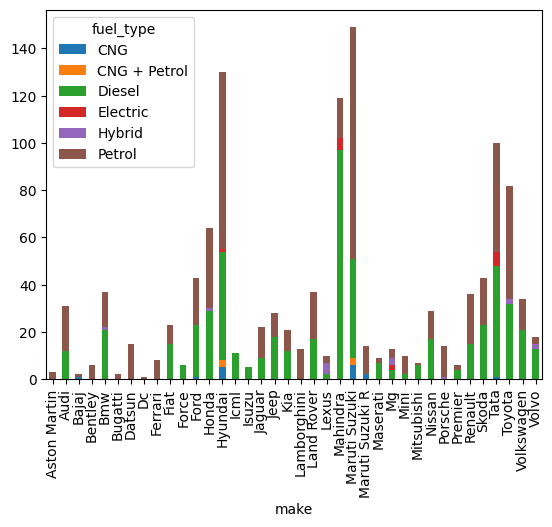

In [71]:
pd.crosstab(new_df['make'], new_df['fuel_type']).plot(kind='bar', stacked=True)
plt.show()